In [4]:
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import re

In [15]:
subject_number = 'Subject Number'
age = 'Age (Years)'
gender = 'Gender'
height = 'Reported Height (cm)'
weight = 'Reported Weight (kg)'
shoe_size = 'Shoe Size NL'
pants_size='Pants Size Waist'
#measurements
# shoe_size_italy="Shoe Size IT"
pant_size='Pants Size Waist'
cup_size='Cup Size'
bra_size='Bra Size NL'

jacket_size='Jacket Size'
# italy_jacket_size='Jacket Size IT'


demographic=[subject_number,gender,age, height, weight, shoe_size,pant_size,cup_size,bra_size]
# italy_demographic=[subject_number,gender,age, height, weight, shoe_size_italy,pant_size,italy_jacket_size]

In [16]:
demographic_path = "../../dutch/demographic_metric.csv"

In [31]:
demographic_data=pd.read_csv(demographic_path,skipinitialspace=True,usecols=demographic)
# measurement_data=pd.read_csv(measurement_path,skipinitialspace=True,usecols=mearuments)
# measurement_data=measurement_data[mearuments]
demographic_data=demographic_data.loc[demographic_data[gender]=='Female'] #shape  Male (567,6) Female (700,6)
demographic_data.head()
# print(demographic_data.shape)# 567,8
demographic_data.dropna(axis=0,how='any',inplace=True) # shape (564,*)
# print(demographic_data.shape) # 567
demographic_data=demographic_data[demographic_data[height].str.contains("No Response")==False]
demographic_data = demographic_data[demographic_data[weight].str.contains("No Response") == False]
demographic_data = demographic_data[demographic_data[shoe_size].str.contains("No Response") == False]
demographic_data = demographic_data[demographic_data[pants_size].str.contains("No Response") == False]
demographic_data = demographic_data[demographic_data[cup_size].str.contains("No Response") == False]
demographic_data = demographic_data[demographic_data[pants_size].str.contains("Don't Know") == False]
demographic_data = demographic_data[demographic_data[bra_size].str.contains("No Response") == False]
demographic_data = demographic_data[demographic_data[pants_size].str.contains("75 or Smaller") == False]
demographic_data = demographic_data[demographic_data[bra_size].str.contains("46 or Smaller") == False]
# print(demographic_data.shape) # 234
demographic_data[height] = pd.to_numeric(demographic_data[height])
demographic_data[weight]=pd.to_numeric(demographic_data[weight])
demographic_data[shoe_size]=pd.to_numeric(demographic_data[shoe_size])
demographic_data[pants_size]=pd.to_numeric(demographic_data[pants_size])
demographic_data[bra_size]=pd.to_numeric(demographic_data[bra_size])
features = demographic_data.columns.tolist()
target = features[-3:] #get last column

    #features = list(set(features) - set([target]))
features = features[:-3]


In [25]:
demographic_data.dtypes

Subject Number            int64
Age (Years)               int64
Gender                   object
Reported Height (cm)    float64
Reported Weight (kg)    float64
Shoe Size NL            float64
Pants Size Waist          int64
Cup Size                 object
Bra Size NL               int64
dtype: object

['Subject Number', 'Age (Years)', 'Gender', 'Reported Height (cm)', 'Reported Weight (kg)', 'Shoe Size NL']


In [29]:


# encoder=preprocessing.OneHotEncoder().fit_transform(demographic_data[cup_size].values.reshape(-1,1)).toarray()
# #convert list to dataframe
# # print(encoder)
# # chest_waist[inverted_triangle]=encoder[:,0]
# # chest_waist[rectangle]=encoder[:,1]
# # chest_waist[triangle]=encoder[:,2]
# # encoder=pd.DataFrame(encoder)
# # #rename columns
# # encoder.columns=[inverted_triangle,rectangle]
# # #merge with chest_waist dataframe
# # chest_waist=chest_waist.merge(encoder)
# # chest_waist.head()
# print(encoder.shape)

(417, 7)


<AxesSubplot:>

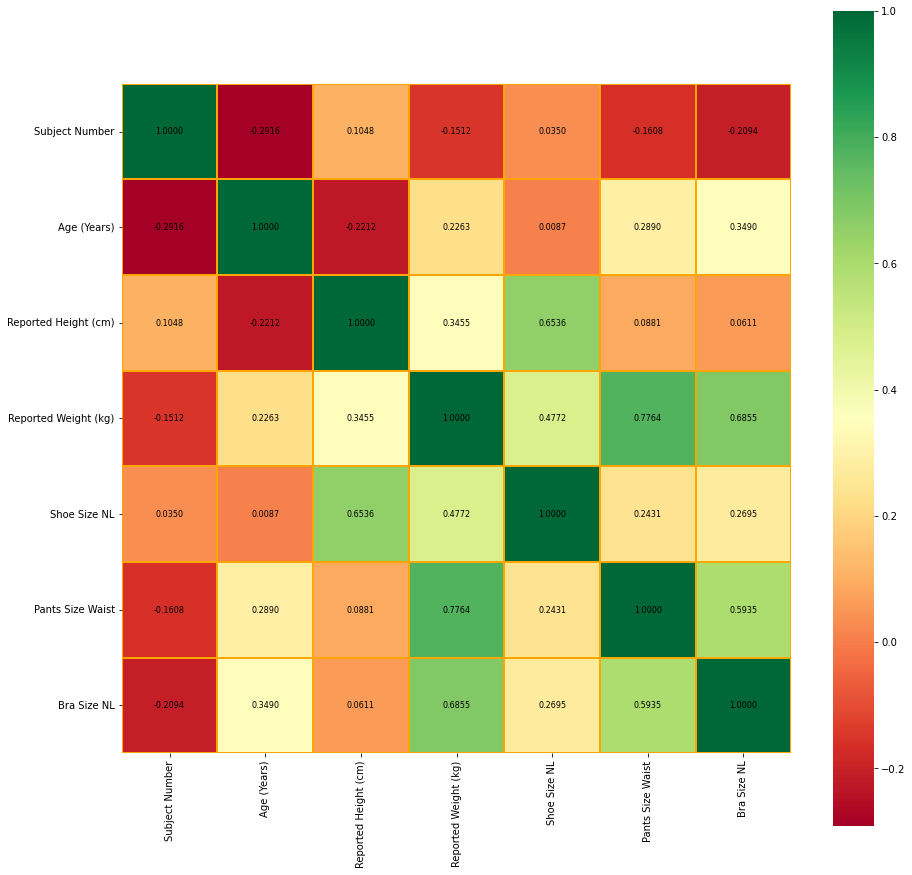

In [27]:
plt.figure(figsize=(15,15))
sns.heatmap(demographic_data.corr(),annot=True,cmap='RdYlGn',linewidths=2,linecolor='orange',annot_kws={'size':8,'color':'black'},fmt='.4f',square=True)

In [35]:
X_dutch = demographic_data[features]
y_dutch = demographic_data[target]


In [36]:
#Train and test
X_train_dutch,X_test_dutch,y_train_dutch,y_test_dutch=train_test_split(X_dutch,y_dutch,test_size=0.20,random_state=42)
#Train and validation

X_train_dutch,X_val_dutch,y_train_dutch,y_val_dutch=train_test_split(X_train_dutch,y_train_dutch,test_size=0.20,random_state=42)

# additional_df=pd.concat([X_test_dutch[subject_number],X_test_dutch[pants_size],X_test_dutch['shape']],axis=1)
X_test_dutch=X_test_dutch.drop(subject_number,axis=1)

# X_test_dutch=X_test_dutch.drop(pants_size,axis=1)
X_train_dutch=X_train_dutch.drop(subject_number,axis=1)

# X_train_dutch=X_train_dutch.drop(pants_size,axis=1)
X_val_dutch=X_val_dutch.drop(subject_number,axis=1)

# X_val_dutch=X_val_dutch.drop(pants_size,axis=1)

In [37]:
X_train_dutch.to_csv("./dutch/X_train.csv",encoding='utf-8',index=False)
y_train_dutch.to_csv("./dutch/y_train.csv",encoding='utf-8',index=False)

X_test_dutch.to_csv("./dutch/X_test.csv",encoding='utf-8',index=False)
y_test_dutch.to_csv("./dutch/y_test.csv",encoding='utf-8',index=False)

X_val_dutch.to_csv("./dutch/X_val.csv",encoding='utf-8',index=False)
y_val_dutch.to_csv("./dutch/y_val.csv",encoding='utf-8',index=False)

# additional_df.to_csv("additional_df.csv",encoding='utf-8',index=False)